### Projeto de avaliação da disciplina Introdução à Análise de Dados - Prof. Luciano Barbosa
#### Alunos: David Soares (dsm3@cin.ufpe.br) & Wanderson R. Marques (wrm@cin.ufpe.br)

#### Importação das Bibliotecas e do Dataset

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [118]:
# Importação dataset
df = pd.read_csv('Focos_2021-01-01_2021-08-31.csv')

In [119]:
# Número de linhas e colunas do DataSet
df.shape

(10448, 12)

In [120]:
# Amostra do dataset
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021/01/01 17:00:00,AQUA_M-T,Brasil,PARA,SANTA MARIA DAS BARREIRAS,Amazonia,NaN,NaN,NaN,-8.577,-49.952,8.8
1,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,AVEIRO,Amazonia,NaN,NaN,NaN,-3.909,-56.037,18.9
2,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,AVEIRO,Amazonia,NaN,NaN,NaN,-3.904,-56.045,9.5
3,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,JACAREACANGA,Amazonia,NaN,NaN,NaN,-5.845,-57.716,149.8
4,2021/01/01 17:05:00,AQUA_M-T,Brasil,PARA,ORIXIMINA,Amazonia,NaN,NaN,NaN,-1.587,-55.922,11.3


In [121]:
# Principais estatíscas descritivas dos dados
df.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,10157.000000,10157.000000,10157.000000,10448.000000,10448.000000,10448.000000
mean,10.516393,0.652939,-1.590430,-5.974887,-53.471519,83.031116
std,54.428077,2.926083,47.520374,2.098492,2.791692,185.566276
min,-999.000000,0.000000,-999.000000,-9.791000,-58.437100,3.200000
25%,4.000000,0.000000,0.400000,-7.347650,-55.458268,16.100000
50%,7.000000,0.000000,0.800000,-6.461555,-54.752210,32.000000
75%,15.000000,0.000000,1.000000,-4.921665,-51.481270,74.500000
max,110.000000,48.200000,1.000000,2.315000,-46.218000,3543.400000


### Pré-processamento dos Dados

#### Definição de Tipos

In [122]:
# Visualização dos tipos
df.dtypes

datahora         object
satelite         object
pais             object
estado           object
municipio        object
bioma            object
diasemchuva     float64
precipitacao    float64
riscofogo       float64
latitude        float64
longitude       float64
frp             float64
dtype: object

In [123]:
# Ajuste dos Tipos
df['datahora'] = pd.to_datetime(df['datahora'], format="%Y/%m/%d %H:%M:%S")
df['satelite'] = df['satelite'].astype('category')
df['pais'] = df['pais'].astype('category')
df['estado'] = df['estado'].astype('category')
df['municipio'] = df['municipio'].astype('category')
df['bioma'] = df['bioma'].astype('category')

In [124]:
# Verificação dos tipos após modificação
df.dtypes

datahora        datetime64[ns]
satelite              category
pais                  category
estado                category
municipio             category
bioma                 category
diasemchuva            float64
precipitacao           float64
riscofogo              float64
latitude               float64
longitude              float64
frp                    float64
dtype: object

#### Removendo colunas irrelevantes 

As colunas foram removidas porque todas as linhas continham as mesmas informações, a saber: **país(Brasil), estado(Pará), satélite(AQUA_M-T), bioma(Amazonia)**.

In [125]:
df = df.drop(columns=['pais','estado','satelite','bioma'])

**Remoção de linhas** com dados ausentes, usando o risco de fogo como filtro, pois o cálculo do risco de fogo depende diretamente do conhecimento dos dias sem chuva e do volume de precipitação para aquele dia. Portanto, se a informação do risco de fogo é ausente, implica que a informação dos dias sem chuva e precipitação também é ausente.

In [126]:
# Remoção de linhas especificando a coluna "riscofogo"
df.dropna(subset=["riscofogo"], inplace=True)

In [127]:
# Reiniciando os índices 
df.reset_index(inplace=True,drop=True)
df.head()

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021-01-04 17:35:00,ORIXIMINA,1.0,2.5,0.5,2.066,-55.929,12.6
1,2021-01-05 16:40:00,MOJU,0.0,15.6,0.0,-3.039,-49.437,13.9
2,2021-01-05 16:40:00,CAPITAO POCO,2.0,0.7,0.0,-1.931,-47.215,9.2
3,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.014,-46.658,18.9
4,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.015,-46.667,9.3


**Removendo as linhas** nas quais o "riscofogo" é igual a -999, pois isso representa um código de erro desse parâmetro.

In [128]:
indexNames = df[(df['riscofogo'] == -999)].index
df.drop(indexNames, inplace=True)

In [129]:
# Verificando se ainda existe algum valor do "riscofogo" igual a -999
df[df['riscofogo'] == -999]['riscofogo'].count()

0

In [130]:
# Substituição dos valores inválidos (-999) por zero
df['diasemchuva'] = df['diasemchuva'].replace(-999,0)

In [131]:
# Verificação do resultado da operação anterior
df[df['diasemchuva'] == -999]['diasemchuva'].count()

0

In [132]:
df.head()

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021-01-04 17:35:00,ORIXIMINA,1.0,2.5,0.5,2.066,-55.929,12.6
1,2021-01-05 16:40:00,MOJU,0.0,15.6,0.0,-3.039,-49.437,13.9
2,2021-01-05 16:40:00,CAPITAO POCO,2.0,0.7,0.0,-1.931,-47.215,9.2
3,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.014,-46.658,18.9
4,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.015,-46.667,9.3


### Normalização e Discretização

#### Normalização

In [133]:
# Principais estatísticas descritivas para a coluna 'frp'
df['frp'].describe()

count    10134.000000
mean        84.375064
std        187.332087
min          3.200000
25%         16.400000
50%         32.500000
75%         75.800000
max       3543.400000
Name: frp, dtype: float64

<AxesSubplot:>

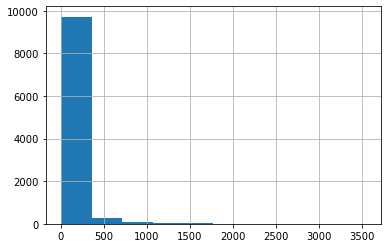

In [134]:
# Histograma da columa 'frp'
df['frp'].hist()

In [135]:
# Normalização da coluna 'frp' no intervalo [0,1]
escala_min_max = pp.MinMaxScaler()
df['frp_norm'] = escala_min_max.fit_transform(df[['frp']])

# Estatísticas descritivas da coluna 'frp' normalizada ('frp_norm')
df['frp_norm'].describe()

count    10134.000000
mean         0.022930
std          0.052916
min          0.000000
25%          0.003729
50%          0.008276
75%          0.020507
max          1.000000
Name: frp_norm, dtype: float64

<AxesSubplot:>

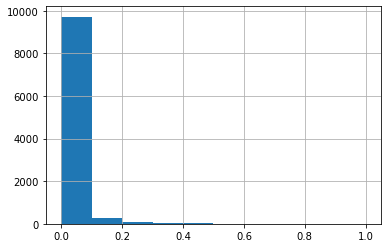

In [136]:
# Exibição do histograma da coluna "frp_norm"
df['frp_norm'].hist()

#### Discretização

**Critério usado para a escolha dos intervalos de discretização:** Baseado na classificação do risco de fogo determinada pelo Programa Queimadas do INPE.

In [137]:
# Definição dos intervalos para discretização da coluna 'riscofogo'
nomes_intervalo = ['RF Mínimo','RF Baixo','RF Médio','RF Alto','RF Crítico']
intervalos = [-0.10, 0.14, 0.40, 0.70, 0.95, 1.00]

df['categorias_riscofogo'] = pd.cut(df['riscofogo'], intervalos, labels=nomes_intervalo)

In [138]:
# Visualização da coluna criada com a discretização
df.head()

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,frp_norm,categorias_riscofogo
0,2021-01-04 17:35:00,ORIXIMINA,1.0,2.5,0.5,2.066,-55.929,12.6,0.002655,RF Médio
1,2021-01-05 16:40:00,MOJU,0.0,15.6,0.0,-3.039,-49.437,13.9,0.003022,RF Mínimo
2,2021-01-05 16:40:00,CAPITAO POCO,2.0,0.7,0.0,-1.931,-47.215,9.2,0.001695,RF Mínimo
3,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.014,-46.658,18.9,0.004435,RF Médio
4,2021-01-05 16:40:00,BRAGANCA,7.0,0.0,0.7,-1.015,-46.667,9.3,0.001723,RF Médio


In [139]:
# Número de ocorrências por categoria em ordem decrescente
df['categorias_riscofogo'].value_counts()

RF Alto       3320
RF Crítico    2582
RF Médio      1693
RF Mínimo     1593
RF Baixo       946
Name: categorias_riscofogo, dtype: int64

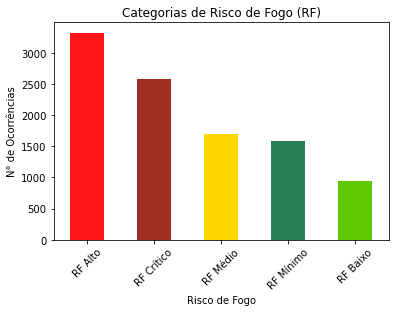

In [140]:
# Exibição das categorias em forma de gráfico
contagens = df['categorias_riscofogo'].value_counts()

cores = '#FF1616 #9F2D21 #FFD700 #277E57 #5EC700'
contagens.plot.bar(rot=45, color=cores.split())
plt.title('Categorias de Risco de Fogo (RF)')
plt.xlabel('Risco de Fogo')
plt.ylabel('N° de Ocorrências')
plt.show()

**Conclusões obtidas com a discretização:** No intervalo de tempo analisado no dataset, verificou-se a maior incidência de ocorrências de risco de fogo alto e risco de fogo crítico. Deste fato pode-se concluir que a probabilidade de ocorrência de focos de incêndio para a região em questão foi muito elevada.

#### Limpeza de dados

In [141]:
# Verificação de dados duplicados
df[df.duplicated()].count()

datahora                0
municipio               0
diasemchuva             0
precipitacao            0
riscofogo               0
latitude                0
longitude               0
frp                     0
frp_norm                0
categorias_riscofogo    0
dtype: int64

Não há registros duplicados no DataSet

In [142]:
# Estatísticas descritivas da coluna "frp"
df['frp'].describe()

count    10134.000000
mean        84.375064
std        187.332087
min          3.200000
25%         16.400000
50%         32.500000
75%         75.800000
max       3543.400000
Name: frp, dtype: float64

Pelos resultados apresentados anteriormente verifica-se um valor máximo muito discrepante, o que sugere um tratamento de dados para remoção de Outliers. Será feito uma avaliação de qual o melhor método para a remoção dos Outliers.

<AxesSubplot:>

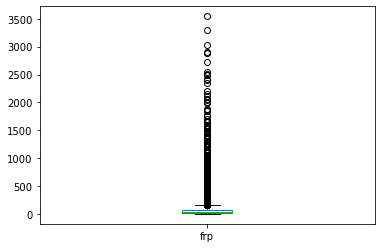

In [143]:
# Exibição do diagrama de caixa
df['frp'].plot.box()

<AxesSubplot:>

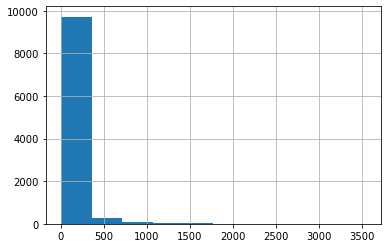

In [144]:
# Exibição do histograma da coluna "frp"
df['frp'].hist()

In [145]:
# Verificação de valores nulos na coluna 'frp' antes de aplicar o logarítimo
df[df['frp'] == 0]['frp'].count()

0

<AxesSubplot:>

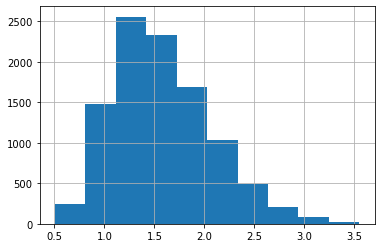

In [146]:
# Conversão para ajustar o conjunto de dados para uma distribuição aproximadamente simétrica
df['frp_log'] = np.log10(df['frp'])
df['frp_log'].hist()

In [147]:
# Cálculo dos quartis e do IQR para a utilização do método de Tukey
q1 = df['frp_log'].quantile(q=0.25)
q3 = df['frp_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

0.6648253575843557


In [148]:
# Outliers inferiores ou mínimos
df[df['frp_log'] < (q1-1.5*iqr)]['frp_log'].count()

0

In [149]:
# Verificação da quantidade de outliers superiores de acordo com o método de Tukey
df[df['frp_log'] > (q3+1.5*iqr)]['frp_log'].count()

135

In [150]:
# Outliers superiores ou máximos
df[df['frp_log'] > (q3+1.5*iqr)]

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,frp_norm,categorias_riscofogo,frp_log
1513,2021-07-21 16:55:00,NOVO PROGRESSO,11.0,0.0,0.8,-6.79200,-55.23500,816.6,0.229761,RF Alto,2.912009
2203,2021-07-29 17:49:00,ITAITUBA,12.0,0.0,0.8,-6.19287,-55.32591,1869.1,0.527061,RF Alto,3.271633
2235,2021-07-29 17:49:00,ITAITUBA,20.0,0.0,1.0,-6.51242,-55.29427,783.4,0.220383,RF Crítico,2.893984
2325,2021-07-30 16:54:00,NOVO PROGRESSO,22.0,0.0,0.9,-7.27305,-55.48598,940.9,0.264872,RF Alto,2.973543
2388,2021-07-31 17:37:00,ALTAMIRA,21.0,0.1,0.9,-6.36802,-55.22302,851.9,0.239732,RF Alto,2.930389
...,...,...,...,...,...,...,...,...,...,...,...
9282,2021-08-24 16:48:00,SAO FELIX DO XINGU,10.0,0.0,1.0,-5.35201,-51.21677,1229.4,0.346365,RF Crítico,3.089693
9308,2021-08-24 16:48:00,SAO FELIX DO XINGU,17.0,0.0,1.0,-5.58183,-51.64378,1199.6,0.337947,RF Crítico,3.079036
10050,2021-08-29 17:07:00,PACAJA,2.0,0.0,0.5,-4.06327,-50.88024,840.3,0.236456,RF Médio,2.924434
10051,2021-08-29 17:07:00,PACAJA,2.0,0.0,0.5,-4.06461,-50.88953,1363.1,0.384131,RF Médio,3.134528


In [151]:
# Cálculo do MAD para a utilização do método Z-Score Robusto
mad = df['frp_log'].mad()
print(mad)

0.39309217516256945


<AxesSubplot:>

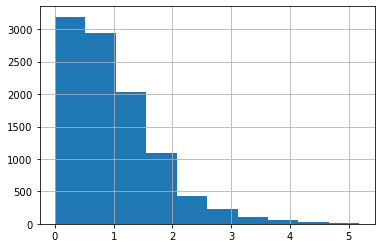

In [152]:
# Valores de Mi
(abs(df['frp_log']-df['frp_log'].median())/mad).hist()

In [153]:
# Verificação dos outliers pelo método Z-Score Robusto
limiar = 4.5
df[abs(df['frp_log']-df['frp_log'].median())/mad > limiar]

,datahora,municipio,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,frp_norm,categorias_riscofogo,frp_log
2536,2021-08-04 17:11:00,NOVO PROGRESSO,40.0,0.0,1.0,-8.06854,-55.28938,2069.2,0.583583,RF Crítico,3.315802
2630,2021-08-04 17:11:00,NOVO PROGRESSO,48.0,0.0,1.0,-8.17124,-55.44312,2202.9,0.621349,RF Crítico,3.342995
2635,2021-08-04 17:11:00,NOVO PROGRESSO,48.0,0.0,1.0,-8.17952,-55.43101,2155.9,0.608073,RF Crítico,3.333629
3093,2021-08-06 16:58:00,SAO FELIX DO XINGU,18.0,0.0,0.9,-6.56849,-53.21798,2490.7,0.702644,RF Alto,3.396321
3104,2021-08-06 16:58:00,SAO FELIX DO XINGU,20.0,0.0,0.9,-6.57857,-53.21653,2114.3,0.596322,RF Alto,3.325167
3205,2021-08-06 16:58:00,ALTAMIRA,21.0,0.0,0.9,-6.41433,-53.35823,2011.3,0.567228,RF Alto,3.303477
3206,2021-08-06 16:58:00,ALTAMIRA,23.0,0.0,0.9,-6.41592,-53.36999,2490.4,0.702559,RF Alto,3.396269
3220,2021-08-06 16:58:00,ALTAMIRA,18.0,0.0,0.9,-6.43467,-53.35545,1983.5,0.559375,RF Alto,3.297432
3227,2021-08-06 16:58:00,ALTAMIRA,16.0,0.0,0.9,-6.44483,-53.35399,2503.1,0.706147,RF Alto,3.398478
3228,2021-08-06 16:58:00,ALTAMIRA,18.0,0.0,0.9,-6.45662,-53.36436,2550.8,0.719620,RF Alto,3.406676


### Estatísticas Descritivas

#### Correlação

In [170]:
# Análise da Correlação entre as colunas 'riscofogo', 'precipitacao', 'latitude' e 'longitude'
df_corr_test = pd.DataFrame(df, columns=['riscofogo', 'precipitacao','latitude','longitude','frp']) 
df_corr_test.corr() # calcula a correlação

,riscofogo,precipitacao,latitude,longitude,frp
riscofogo,1.000000,-0.372886,-0.724639,-0.269648,0.169480
precipitacao,-0.372886,1.000000,0.112722,0.056597,-0.058546
latitude,-0.724639,0.112722,1.000000,0.405539,-0.135403
longitude,-0.269648,0.056597,0.405539,1.000000,-0.102077
frp,0.169480,-0.058546,-0.135403,-0.102077,1.000000


**A partir das informações da tabela de correlação conclui-se:**
* Há uma forte correlação entre o risco de fogo e a latitude;
* Quanto menor o valor da latitude maior o risco de fogo, ou seja, quanto mais afastado da linha do Equador em direção ao sul do Brasil, maior o risco de fogo no estado do Pará;
* Também verifica-se uma boa correlação entre o risco de fogo e a precipitação de chuva acumulada para o dia avaliado. Quanto menor for o volume de chuva maior será o risco de fogo;
* Não foi verificada correlação expressiva entre a potência radiativa de queima e o risco de fogo.

In [175]:
# Cálculo das frequências do risco de fogo para latitudes menores que -5°
df[df['latitude'] < -5.0]['riscofogo'].value_counts()

1.0    2489
0.9    1961
0.8    1230
0.7     693
0.6     377
0.5     252
0.0     179
0.4     159
0.3     104
0.1      89
0.2      81
Name: riscofogo, dtype: int64

In [176]:
# Cálculo das frequências do risco de fogo para latitudes maiores que -5°
df[df['latitude'] > -5.0]['riscofogo'].value_counts()

0.0    877
0.1    448
0.2    253
0.5    211
0.3    176
0.4    172
0.6     99
1.0     93
0.9     69
0.7     61
0.8     60
Name: riscofogo, dtype: int64

**Verificação da informação obtida através da tabela de correlação:**
A maior parte do estado do Pará está localizado, aproximadamente, entre as latitudes 2° e -10°, por isso foi realizada a verificação da frequências de valores para risco de fogo para valores da latitude menores e maiores que -5°. Dos resultados obtidos, observou-se que as maiores frequências para risco de fogo, maior ou igual a 0.9, ocorrem para latitudes menores que -5°. Isso ratifica a conclusão encontrada anteriormente por meio da tabela de correlação: quanto menor a latitude maior o risco de fogo. 